In [ ]:
# Upload data from local drive
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train4.csv to train4.csv


## Keras （User-Product pairs)

In [ ]:
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from keras.utils import to_categorical

In [ ]:
from keras.layers import Embedding, Input, dot, concatenate
from keras.models import Model
from IPython.display import SVG
#from keras.utils.vis_utils import model_to_do

In [ ]:
import pandas as pd

df = pd.read_csv('train4.csv') # train
#df_val = pd.read_csv('validation.csv') # validation

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

user_enc = LabelEncoder()
df['user_id'] = user_enc.fit_transform(df['user_id'].values)
n_users = df['user_id'].nunique()
item_enc = LabelEncoder()
df['product_id'] = item_enc.fit_transform(df['product_id'].values)
n_products = df['product_id'].nunique()
df['purchase_count'] = df['purchase_count'].values.astype(np.float32)
min_cnt = min(df['purchase_count'])
max_cnt = max(df['purchase_count'])
n_users, n_products , min_cnt, max_cnt


(37284, 36847, 1.0, 18.0)

In [ ]:
X = df[['user_id', 'product_id']].values
Y = df['purchase_count'].values

from sklearn.model_selection import train_test_split
x_train1, x_test, y_train1, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
x_train, x_val, y_train, y_val = train_test_split(x_train1, y_train1, test_size = 0.2, random_state = 42)


In [ ]:
#x_train.shape, x_val.shape, y_train.shape, y_val.shape

In [ ]:
# embeddings

num_latent_factors = 30

X_train_array = [x_train[:, 0], x_train[:, 1]]
X_test_array = [x_test[:, 0], x_test[:, 1]]

In [ ]:
from keras.models import Model
from keras.layers import Input, Reshape, Dot
from keras.layers.embeddings import Embedding
from keras.optimizers import Adam
from keras.regularizers import l2
def RecommenderV1(n_users, n_products, n_factors):
    user = Input(shape=(1,))
    u = Embedding(n_users, n_factors, embeddings_initializer='he_normal',
                  embeddings_regularizer=l2(1e-6))(user)
    u = Reshape((n_factors,))(u)
    
    product = Input(shape=(1,))
    m = Embedding(n_products, n_factors, embeddings_initializer='he_normal',
                  embeddings_regularizer=l2(1e-6))(product)
    m = Reshape((n_factors,))(m)
    
    x = Dot(axes=1)([u, m])
    model = Model(inputs=[user, product], outputs=x)
    opt = Adam(lr=0.001)
    model.compile(loss='mean_squared_error', optimizer=opt, metrics = ['acc'])
    return model

In [ ]:

n_factors = 30

In [ ]:
model = RecommenderV1(n_users, n_products, n_factors)
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1, 30)        1118520     input_1[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1, 30)        1105410     input_2[0][0]                    
_______________________________________________________________________________________

In [ ]:
history = model.fit(x=X_train_array, y=y_train, batch_size=2048, epochs=30, verbose=1,
                    validation_data=(X_test_array, y_test))

Epoch 1/30


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:432: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


232/232 [==============================] - 4s 15ms/step - loss: 1.1999 - acc: 0.0000e+00 - val_loss: 1.1692 - val_acc: 0.0000e+00
Epoch 2/30
232/232 [==============================] - 3s 15ms/step - loss: 0.8999 - acc: 0.0808 - val_loss: 0.5808 - val_acc: 0.3120
Epoch 3/30
232/232 [==============================] - 3s 15ms/step - loss: 0.3948 - acc: 0.5684 - val_loss: 0.3039 - val_acc: 0.7056
Epoch 4/30
232/232 [==============================] - 3s 15ms/step - loss: 0.2313 - acc: 0.8029 - val_loss: 0.2207 - val_acc: 0.8288
Epoch 5/30
232/232 [==============================] - 3s 15ms/step - loss: 0.1764 - acc: 0.8787 - val_loss: 0.1882 - val_acc: 0.8763
Epoch 6/30
232/232 [==============================] - 3s 15ms/step - loss: 0.1528 - acc: 0.9098 - val_loss: 0.1733 - val_acc: 0.8983
Epoch 7/30
232/232 [==============================] - 3s 15ms/step - loss: 0.1408 - acc: 0.9245 - val_loss: 0.1658 - val_acc: 0.9102
Epoch 8/30
232/232 [==============================] - 3s 15ms/step - los

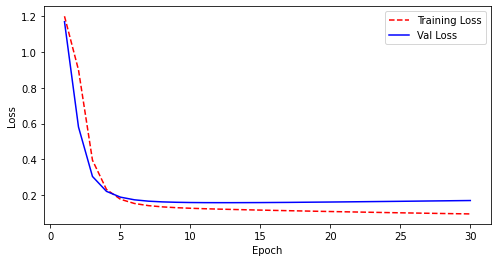

In [ ]:
%matplotlib inline
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.figure(figsize = (8,4))
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Val Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
model.evaluate(X_test_array, y_test,verbose=0)


[0.16937674582004547, 0.9330628514289856]

In [ ]:
y_pred1 = model.predict(X_test_array)

In [ ]:
def precisionatk(y_true,y_pred, k):
    precision_average = []
    idx =  (-y_pred).argsort(axis=-1)[:,:k] ###k
    for i in range(idx.shape[0]):
        precision_sample = 0
        for j in idx[i,:]:
            if y_true[j] > 0:
                precision_sample += 1
        precision_sample = precision_sample / k
        precision_average.append(precision_sample)
    return np.mean(precision_average)

In [ ]:
pre_k2 = []
for k in range(2, 31):
    pre = precisionatk(y_test, y_pred1, k)
    pre_k2.append(pre)

In [ ]:
np.mean(pre_k2)

0.10327541830759966

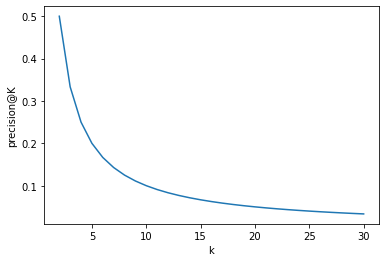

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(2, 31), pre_k2)
plt.xlabel('k')
plt.ylabel('precision@K')
plt.show()

# User- brand pair (this)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving user-brand-cnt-3-months.csv to user-brand-cnt-3-months.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df2 = pd.read_csv('user-brand-cnt-3-months.csv')

In [ ]:
count = df2['purchase_count']
df2 =df2.drop(['purchase_count', 'brand'], axis = 1)
df2['purchase_count'] = count

In [ ]:
df2

,user_id,brand_id,purchase_count
0,10280338,0,0.333333
1,28129653,0,0.333333
2,72062431,0,0.333333
3,105697630,0,0.333333
4,126051562,0,0.666667
...,...,...,...
205879,594355111,249,0.333333
205880,594391949,249,0.666667
205881,594426448,249,0.333333
205882,595026228,249,0.333333


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

user_enc = LabelEncoder()
df2['user_id'] = user_enc.fit_transform(df2['user_id'].values)
n_users = df2['user_id'].nunique()
item_enc = LabelEncoder()
df2['brand_id'] = item_enc.fit_transform(df2['brand_id'].values)
n_brands = df2['brand_id'].nunique()
df2['cnt'] = df2['purchase_count'].values.astype(np.float32)
min_cnt = min(df2['purchase_count'])
max_cnt = max(df2['purchase_count'])
n_users, n_brands , min_cnt, max_cnt


(64262, 234, 0.3333333333333333, 53.0)

In [ ]:
X = df2[['user_id', 'brand_id']].values
Y = df2['purchase_count'].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42) 

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((164707, 2), (41177, 2), (164707,), (41177,))

In [ ]:
# embeddings

num_latent_factors = 30

X_train_array = [x_train[:, 0], x_train[:, 1]]
X_test_array = [x_test[:, 0], x_test[:, 1]]

In [ ]:
from keras.models import Model
from keras.layers import Input, Reshape, Dot
from keras.layers.embeddings import Embedding
from keras.optimizers import Adam
from keras.regularizers import l2
def RecommenderV1(n_users, n_products, n_factors):
    user = Input(shape=(1,))
    u = Embedding(n_users, n_factors, embeddings_initializer='he_normal',
                  embeddings_regularizer=l2(1e-6))(user)
    u = Reshape((n_factors,))(u)
    
    product = Input(shape=(1,))
    m = Embedding(n_products, n_factors, embeddings_initializer='he_normal',
                  embeddings_regularizer=l2(1e-6))(product)
    m = Reshape((n_factors,))(m)
    
    x = Dot(axes=1)([u, m])
    model = Model(inputs=[user, product], outputs=x)
    opt = Adam(lr=0.001)
    model.compile(loss='mean_squared_error', optimizer=opt, metrics = ['acc',mean_pred])
    return model

In [ ]:

n_factors = 30

In [ ]:
model = RecommenderV1(n_users, n_brands, n_factors)
model.summary()

Model: "functional_33"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_33 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_34 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_32 (Embedding)        (None, 1, 30)        1927860     input_33[0][0]                   
__________________________________________________________________________________________________
embedding_33 (Embedding)        (None, 1, 30)        7020        input_34[0][0]                   
______________________________________________________________________________________

In [ ]:
history = model.fit(x=X_train_array, y=y_train, batch_size=16384, epochs=20, verbose=1,
                    validation_data=(X_test_array, y_test))

Epoch 1/20


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:432: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


11/11 [==============================] - 0s 29ms/step - loss: 1.4766 - acc: 0.0000e+00 - mean_pred: 1.9017e-05 - val_loss: 1.4835 - val_acc: 0.0000e+00 - val_mean_pred: 9.8222e-05
Epoch 2/20
11/11 [==============================] - 0s 18ms/step - loss: 1.4694 - acc: 0.0000e+00 - mean_pred: 0.0040 - val_loss: 1.4827 - val_acc: 0.0000e+00 - val_mean_pred: 5.4223e-04
Epoch 3/20
11/11 [==============================] - 0s 17ms/step - loss: 1.4609 - acc: 0.0000e+00 - mean_pred: 0.0086 - val_loss: 1.4812 - val_acc: 0.0000e+00 - val_mean_pred: 0.0015
Epoch 4/20
11/11 [==============================] - 0s 17ms/step - loss: 1.4499 - acc: 0.0000e+00 - mean_pred: 0.0148 - val_loss: 1.4786 - val_acc: 0.0000e+00 - val_mean_pred: 0.0031
Epoch 5/20
11/11 [==============================] - 0s 17ms/step - loss: 1.4356 - acc: 0.0000e+00 - mean_pred: 0.0229 - val_loss: 1.4745 - val_acc: 0.0000e+00 - val_mean_pred: 0.0058
Epoch 6/20
11/11 [==============================] - 0s 18ms/step - loss: 1.4175 - ac

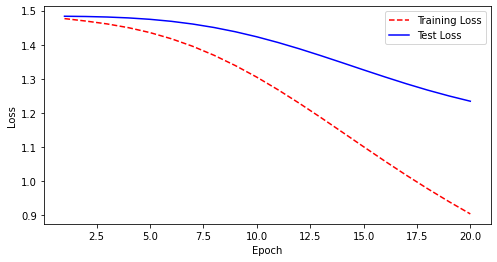

In [ ]:
%matplotlib inline
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.figure(figsize = (8,4))
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
loss, accuracy= model.evaluate(X_test_array, y_test,verbose=0)

In [ ]:
model.evaluate(X_test_array, y_test,verbose=0)

[1.2341417074203491, 0.006071350537240505, 0.199106827378273]

In [ ]:
y_pred = model.predict(X_test_array)

In [ ]:
pre_k = []
for k in range(2, 31):
    pre = precisionatk(y_test, y_pred, k)
    pre_k.append(pre)

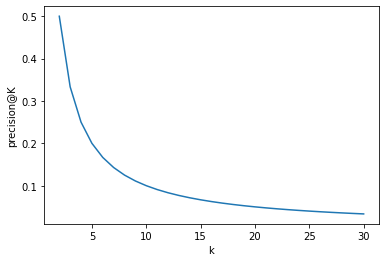

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(2, 31), pre_k)
plt.xlabel('k')
plt.ylabel('precision@K')
plt.show()

In [ ]:
SVG(model_to_dot( model,  show_shapes=True, show_layer_names=True, dpi=65).create(prog='dot', format='svg'))